In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving IMDb_movies.csv to IMDb_movies.csv
Saving IMDb_names.csv to IMDb_names.csv
Saving IMDb_ratings.csv to IMDb_ratings.csv
Saving IMDb_title_principals.csv to IMDb_title_principals.csv


In [33]:
movies_df = pd.read_csv('IMDb_movies.csv')
ratings_df = pd.read_csv('IMDb_ratings.csv')
names_df = pd.read_csv('IMDb_names.csv')
title_principals_df = pd.read_csv('IMDb_title_principals.csv')

<ipython-input-33-3543200e557f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('IMDb_movies.csv')


In [34]:
def clean_currency_column(column):
    if column.dtype == object:
        return pd.to_numeric(column.str.replace('[\$\,]', '', regex=True), errors='coerce')
    return column

In [35]:
# Combine movies, ratings, title_principals and names df.
combined_df = movies_df.merge(ratings_df, on='imdb_title_id', how='inner')
combined_df = combined_df.merge(title_principals_df, on='imdb_title_id', how='left')
combined_df = combined_df.merge(names_df, left_on='imdb_name_id', right_on='imdb_name_id', how='left')

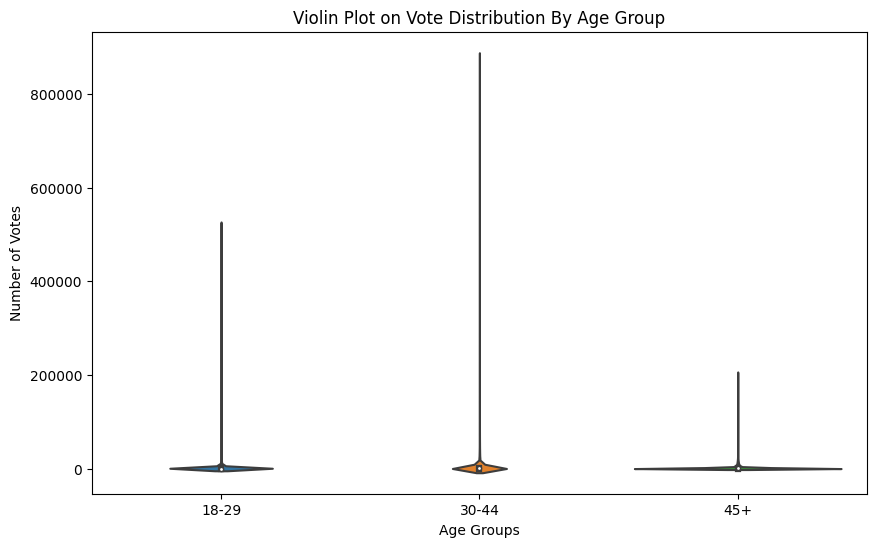

In [36]:
# Visualization 1: Vote Distribution By Age (using a violin plot).
age_columns = {
    'allgenders_18age_votes': '18-29',
    'allgenders_30age_votes': '30-44',
    'allgenders_45age_votes': '45+'
}
age_data = combined_df.rename(columns=age_columns)[list(age_columns.values())]
# Violin Plot: x-axis is age groups and y-axis is number of votes.
plt.figure(figsize=(10, 6))
# The "bw" parameter adjusts the bandwidth emphasis on denser areas.
sns.violinplot(data=age_data, bw=0.2)
plt.title('Violin Plot on Vote Distribution By Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Votes')
plt.show()

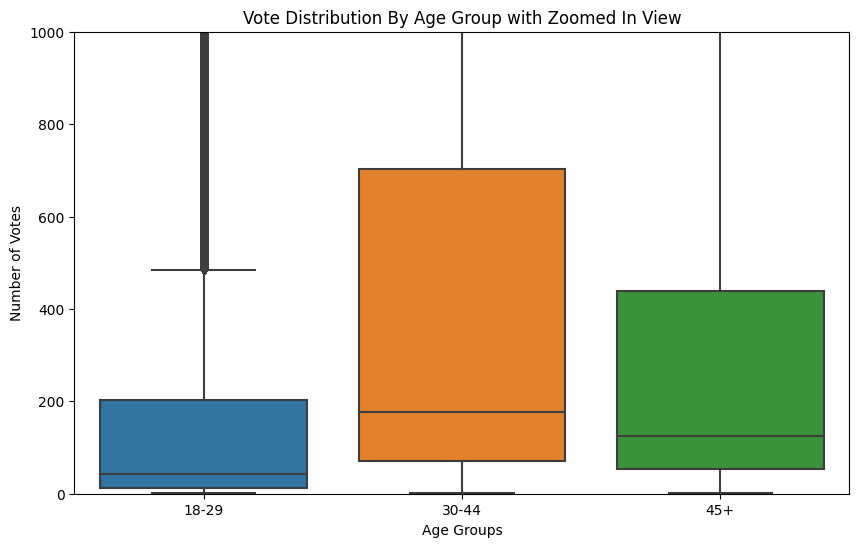

In [37]:
# Visualization 1.1: Vote Distribution By Age (using a boxplot) with Zoomed In View.
plt.figure(figsize=(10, 6))
# Boxplot: age groups on the x-axis and number of votes on the y-axis.
sns.boxplot(data=age_data)
plt.title('Vote Distribution By Age Group with Zoomed In View')
plt.xlabel('Age Groups')
plt.ylabel('Number of Votes')
plt.ylim(0, 1000)
plt.show()

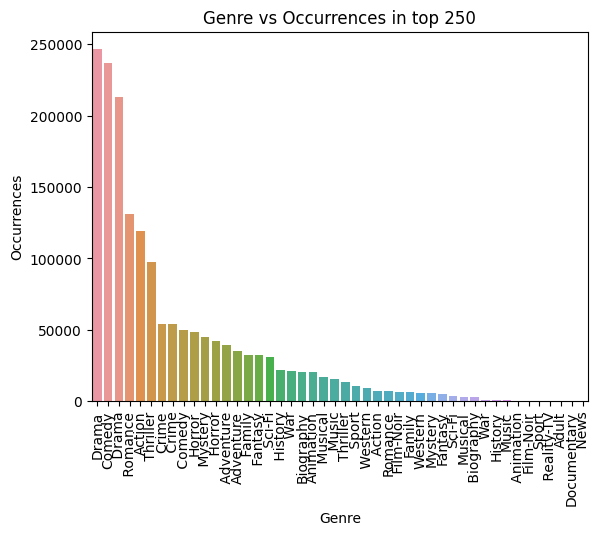

In [38]:
# Visualization 2: Genre vs Occurrences in Top 250.

# Genre columns split into separate genres per movie as some movies may have multiple genres listed.
combined_df['genres'] = combined_df['genre'].str.split(',')

# Genres column exploded to rows for each genre separately, allowing for all independent genres (even the ones existing with others) covered to be counted.
genres_exploded = combined_df.explode('genres')

# Count and select top 250 occurrences of genres — identify most common genres in dataset.
genre_counts = genres_exploded['genres'].value_counts().head(250)

# Barplot: x-axis represents different genres, y-axis shows their occurrences.
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre vs Occurrences in top 250')
plt.xlabel('Genre')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)
plt.show()

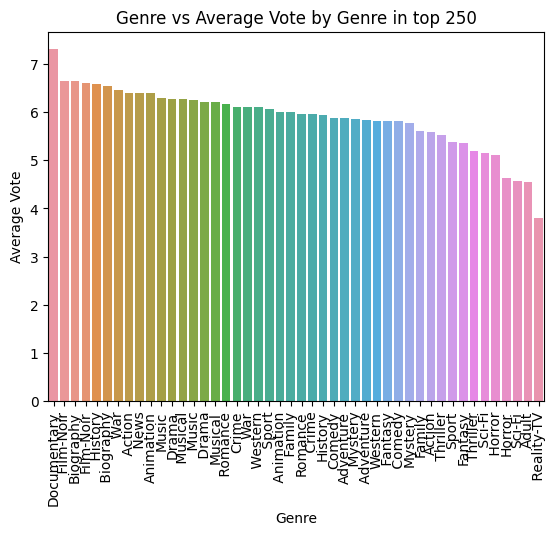

In [39]:
# Visualization 3: Genre vs Average Vote by Genre in Top 250.

# Calculate average vote for each genre — after grouping calculate mean of weighted_average_vote for each genre.
average_votes_by_genre = genres_exploded.groupby('genres')['weighted_average_vote'].mean().sort_values(ascending=False).head(250)

# Barplot: genres are on the x-axis and their average votes are on the y-axis.
sns.barplot(x=average_votes_by_genre.index, y=average_votes_by_genre.values)
plt.title('Genre vs Average Vote by Genre in top 250')
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.xticks(rotation=90)
plt.show()

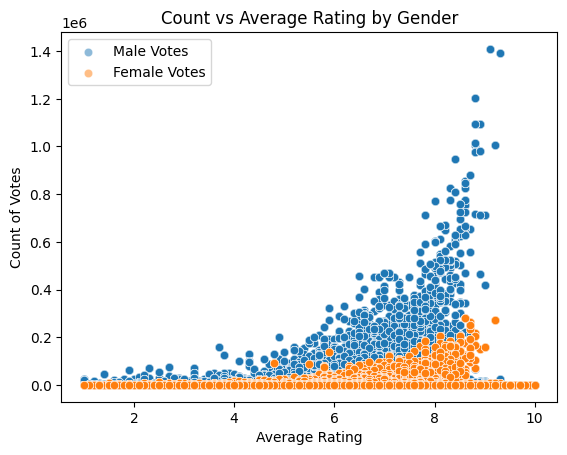

In [40]:
# Visualization 4: Count vs Average Rating.

# Scatterplot plots males_allages_avg_vote (average rating) on x-axis and males_allages_votes (count of votes) on  y-axis
# 'alpha' added and set to 0.5 for better visibility when points overlap.
sns.scatterplot(data=combined_df, x='males_allages_avg_vote', y='males_allages_votes', label='Male Votes', alpha=0.5)

# Scatterplot plots females_allages_avg_vote (average rating) on x-axis and females_allages_votes (count of votes) on  y-axis
# 'alpha' added and set to 0.5 for better visibility when points overlap.
sns.scatterplot(data=combined_df, x='females_allages_avg_vote', y='females_allages_votes', label='Female Votes', alpha=0.5)
plt.title('Count vs Average Rating by Gender')
plt.xlabel('Average Rating')
plt.ylabel('Count of Votes')
plt.legend()
plt.show()

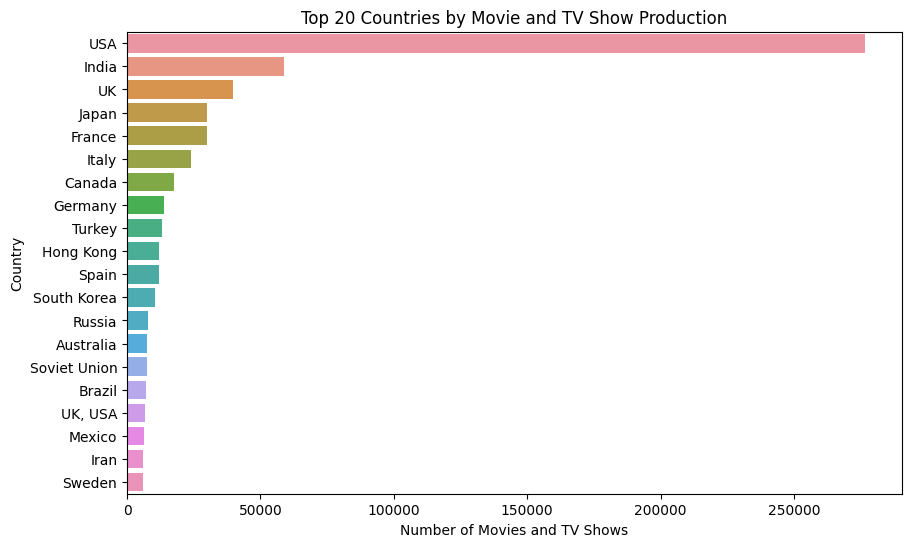

In [41]:
# Visualization 5: Top 20 Countries by Movie and TV Show Production.

# Country occurrence count from country column to help understand which countries have produced most movies and TV shows and then get the top 20.
country_counts = combined_df['country'].value_counts().head(20)
plt.figure(figsize=(10, 6))

# Barplot: x-axis is number of movies and TV shows and the y-axis represents the lists of countries.
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 20 Countries by Movie and TV Show Production')
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Country')
plt.show()

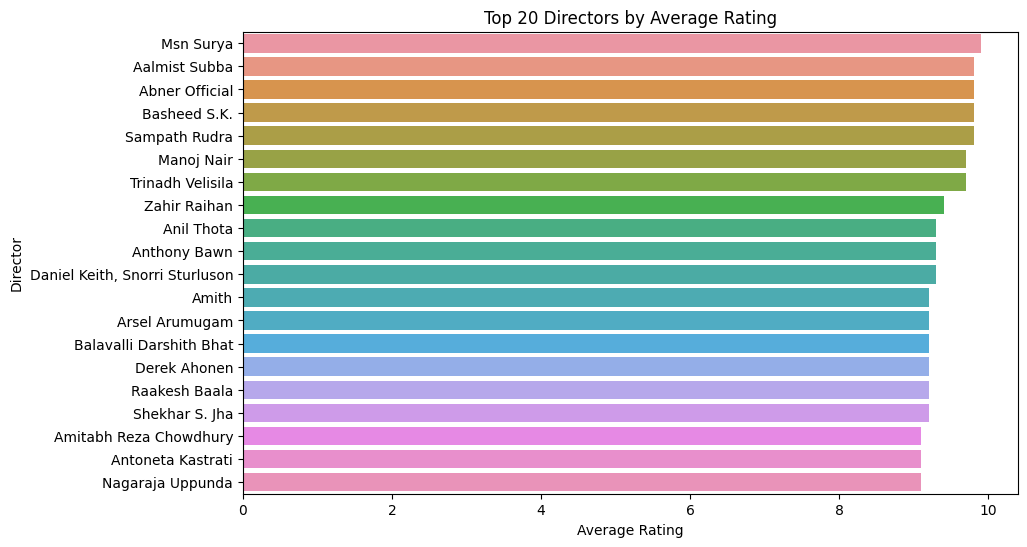

In [42]:
# Visualization 6: Top 20 Directors by Average Rating

# Grouping by director and calculating the average rating for each director.
directors_avg_rating = combined_df.groupby('director')['weighted_average_vote'].mean().nlargest(20)
plt.figure(figsize=(10, 6))

# Barplot: x-axis is average rating, y-axis lists directors
sns.barplot(x=directors_avg_rating.values, y=directors_avg_rating.index)
plt.title('Top 20 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

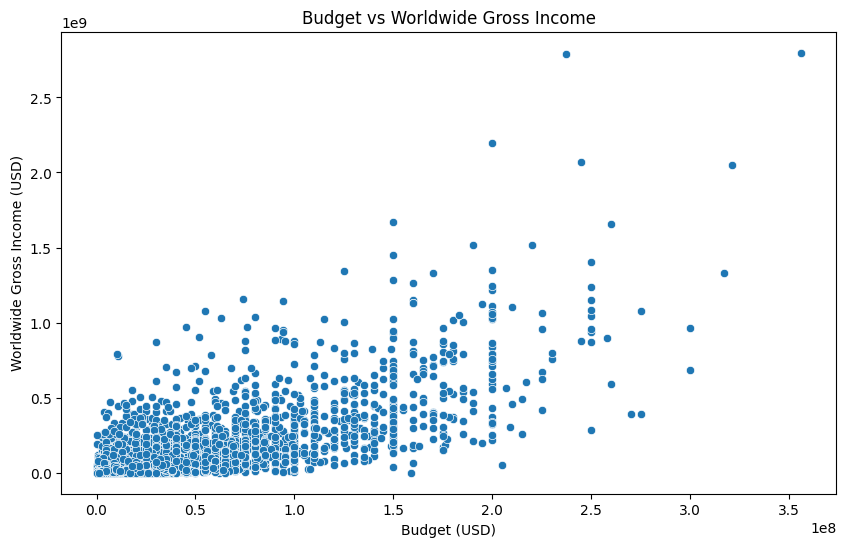

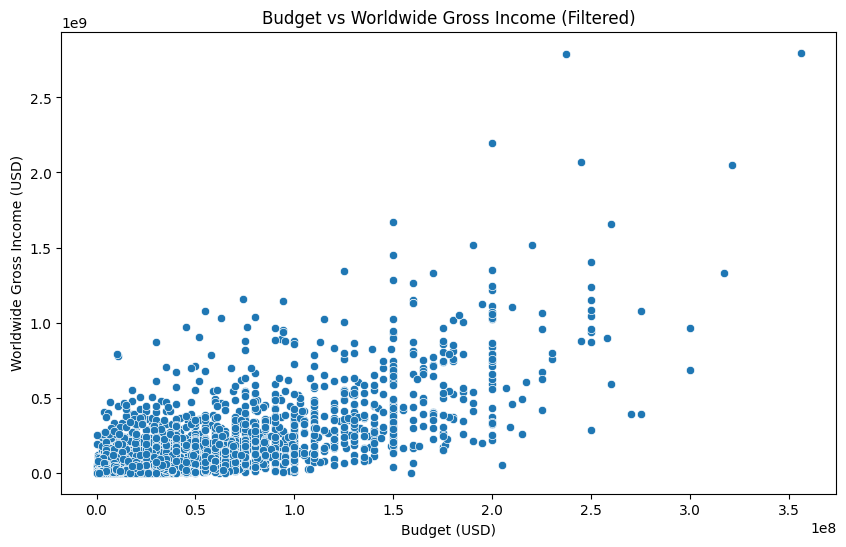

In [43]:
# Visualization 7: Unfiltered Comparison of Budget vs Worldwide Gross Income.
# Visualization 8: Filtered Comparison of Budget vs Worldwide Gross Income.

# Plot to compare budgets of films to worldwide gross income, to visualize if higher budgets drive higher gross incomes.

# Clean up function used on budget and worldwide_gross_income columns to convert to acceptable numerical format.
movies_df['budget'] = clean_currency_column(movies_df['budget'])
movies_df['worlwide_gross_income'] = clean_currency_column(movies_df['worlwide_gross_income'])


filtered_df = movies_df
# Filter out rows where either budget or worldwide gross income is zero (helps to avoid missing or unreported data).
filtered_df1 = movies_df[(movies_df['budget'] > 0) & (movies_df['worlwide_gross_income'] > 0)]

# Scatterplot: budget on the x-axis and worldwide_gross_income on the y-axis.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='budget', y='worlwide_gross_income')
plt.title('Budget vs Worldwide Gross Income')
plt.xlabel('Budget (USD)')
plt.ylabel('Worldwide Gross Income (USD)')
plt.show()

# This scatterplot would reject any possible zero budget ventures and overall affect data integrity.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df1, x='budget', y='worlwide_gross_income')
plt.title('Budget vs Worldwide Gross Income (Filtered)')
plt.xlabel('Budget (USD)')
plt.ylabel('Worldwide Gross Income (USD)')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


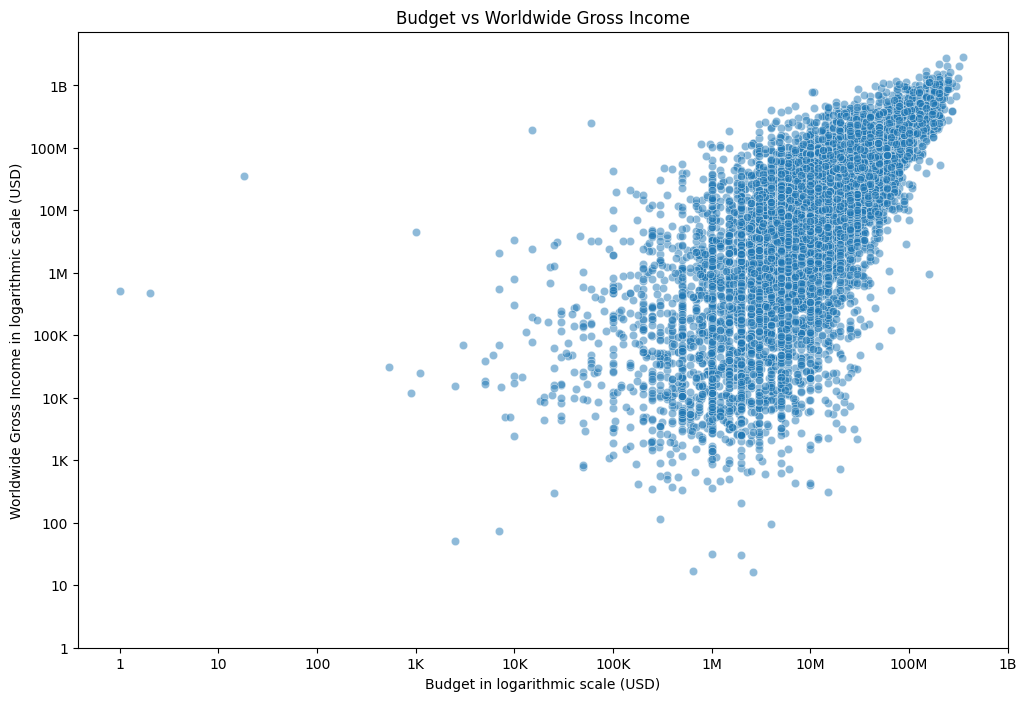

In [44]:
# Visualization 9: Logarithmic Comparison of Budget vs Worldwide Gross Income.
# Comparison to visualize if higher budgets drive higher gross incomes on a logarithmic scale.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=np.log10(filtered_df['budget']),
    y=np.log10(filtered_df['worlwide_gross_income']),
    alpha=0.5
)
plt.title('Budget vs Worldwide Gross Income')
plt.xlabel('Budget in logarithmic scale (USD)')
plt.ylabel('Worldwide Gross Income in logarithmic scale (USD)')

# Custom ticks for readability to better understand logarithmic format.
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    ['1', '10', '100', '1K', '10K', '100K', '1M', '10M', '100M', '1B']
)
plt.yticks(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    ['1', '10', '100', '1K', '10K', '100K', '1M', '10M', '100M', '1B']
)

plt.show()

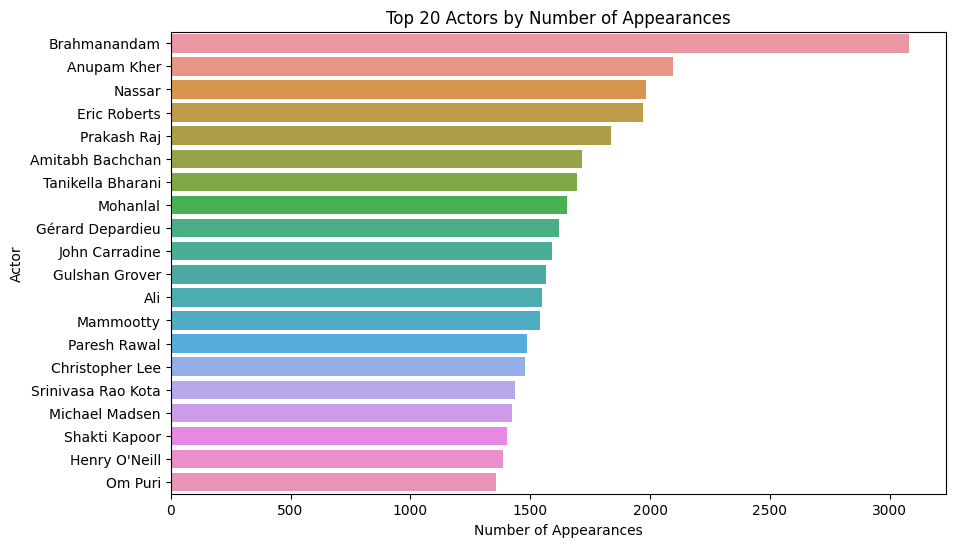

In [45]:
# Visualization 10: Top 20 Actors by Number of Appearances in Movies and TV Shows.

# Splitting the actors column into a list of actors for each movie.
actors_list = combined_df['actors'].str.split(', ').explode()

# Counting the appearances of each actor and selecting the top 20.
actor_counts = actors_list.value_counts().head(20)

# Barplot: x-axis is the count of appearances, and y-axis is the actors.
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title('Top 20 Actors by Number of Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()


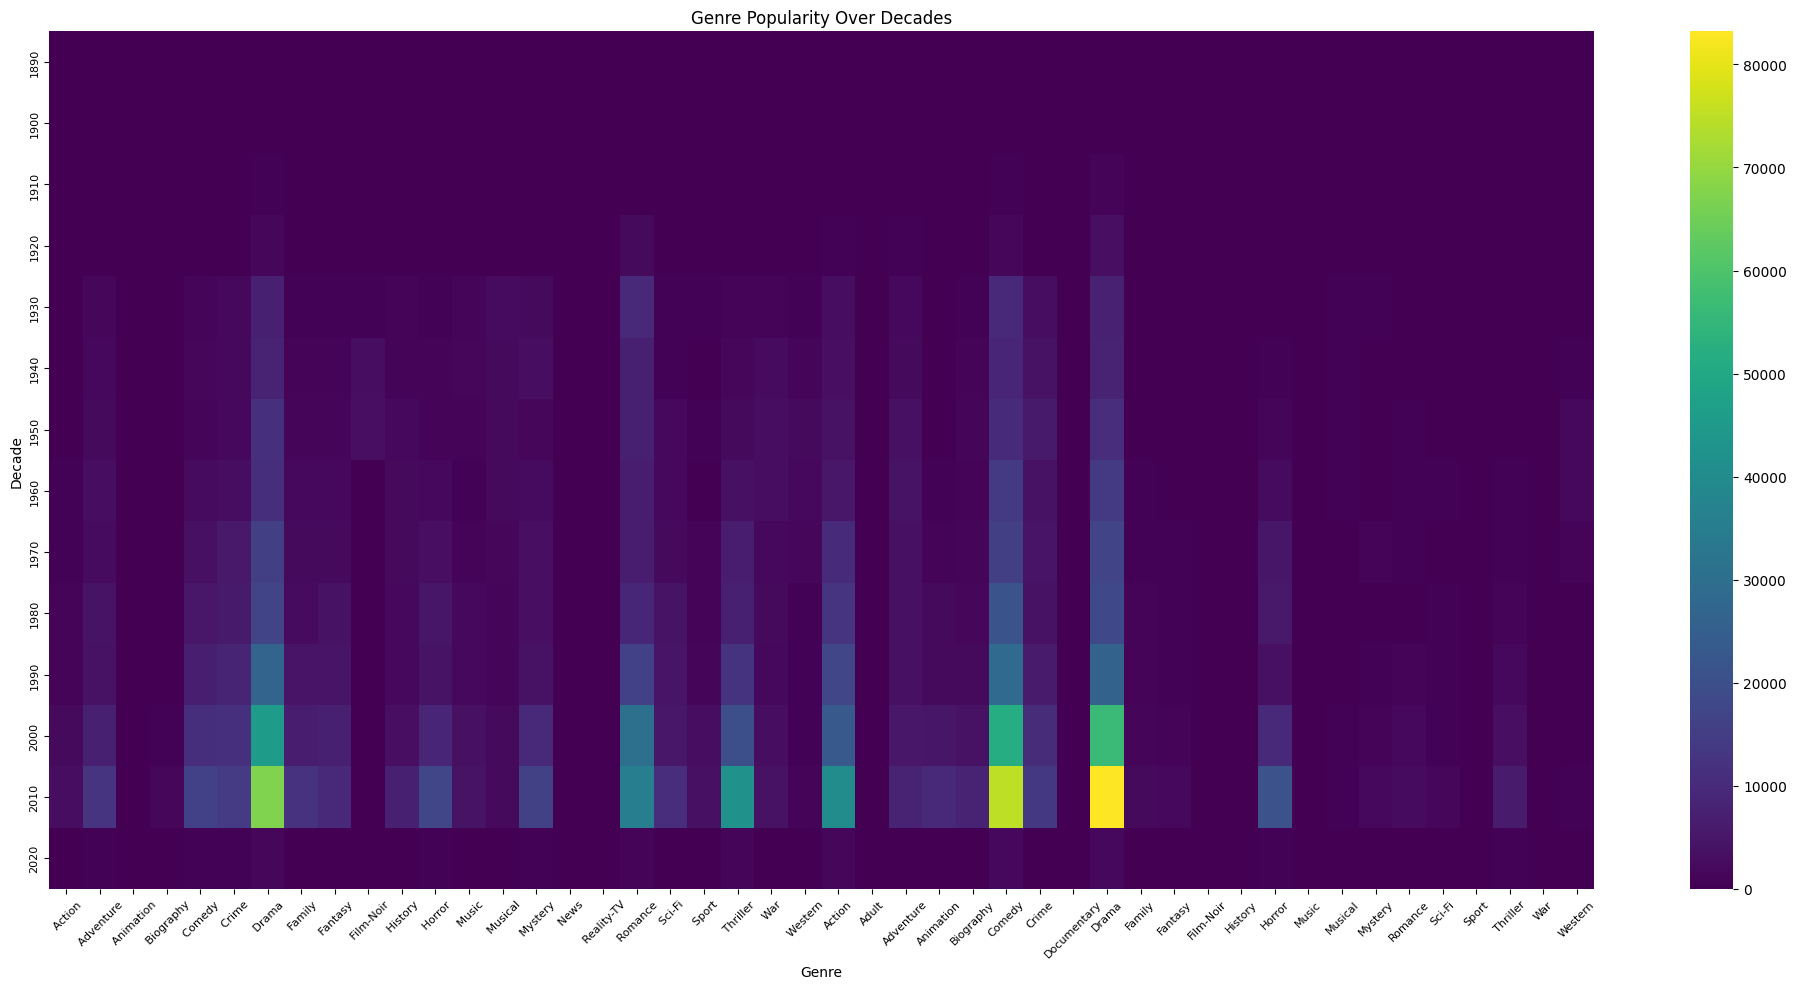

In [46]:
# Visualization 11: Genre Popularity Over Decades Heatmap.

# Clean the year column keeping only numerical values then drop rows containing NaN years after conversion.
combined_df['year'] = pd.to_numeric(combined_df['year'], errors='coerce')
combined_df.dropna(subset=['year'], inplace=True)

# Convert year column to integers — "NaN" values (float) can't be converted to integers.
combined_df['year'] = combined_df['year'].astype(int)

# Calculating and storing the decades from the year column.
combined_df['decade'] = (combined_df['year'] // 10) * 10

# Splitting genres and exploding the dataframe.
combined_df['genres'] = combined_df['genre'].str.split(',')
genres_decade_df = combined_df.explode('genres').groupby(['decade', 'genres']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))

# Heatmap: x-axis is genre, y-axis is decade.
sns.heatmap(genres_decade_df, cmap='viridis', annot=False) # Turn off annotations.
plt.title('Genre Popularity Over Decades')
plt.xlabel('Genre')
plt.ylabel('Decade')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
